In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit=pd.read_csv('creditcard.csv')

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Downsampling ---handle the imbalance dataset

In [6]:
legit=credit[credit['Class']==0]
fraud=credit[credit['Class']==1]

In [7]:
fraud.shape

(492, 31)

In [8]:
from sklearn.utils import resample
legit_down=resample(legit, random_state=42, n_samples=len(fraud),replace=True)

In [9]:
legit_down.shape

(492, 31)

In [10]:
new_credit=pd.concat([fraud,legit_down], axis=0)

In [11]:
new_credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273800,165706.0,2.341158,-1.140193,-1.431234,-1.446218,-0.959278,-1.328559,-0.580484,-0.525896,-1.617138,...,0.204313,1.250873,-0.096074,0.132532,0.408741,0.286812,-0.011742,-0.067825,13.99,0
9384,13744.0,-0.300059,0.364418,1.611098,-1.056658,0.652460,0.112808,0.338364,-0.154589,1.126379,...,-0.051844,0.166848,-0.294988,-0.818076,0.005634,0.907665,-0.267201,-0.249516,20.33,0
38205,39293.0,0.813744,-0.617420,1.782595,1.696710,-1.515473,0.350754,-0.893978,0.316722,1.186037,...,0.305272,0.919456,-0.114790,0.653273,0.272301,-0.189475,0.091363,0.064843,125.53,0
74642,55681.0,-1.833329,0.046103,2.151713,-0.431903,-0.762017,-0.388451,-0.215207,0.714157,-0.162439,...,0.310683,0.559447,-0.071901,0.598248,0.370825,0.617409,0.112006,-0.033303,101.16,0


In [12]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
new_credit2=ss.fit_transform(new_credit)

In [13]:
new_credit_scaled=pd.DataFrame(new_credit2,columns=new_credit.columns)

In [14]:
new_credit_scaled.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
979,1.653269,0.877492,-0.835760,0.329339,-1.170059,0.142252,-0.379208,0.369294,-0.162340,-0.140864,...,-0.060689,1.061355,-0.070564,0.334623,0.547424,0.570873,-0.081659,-0.223468,-0.366292,-1.0
980,-1.534754,0.396429,-0.421783,0.816880,-1.047275,0.523331,0.422263,0.525397,-0.086609,1.046516,...,-0.151829,0.139029,-0.241975,-1.372960,-0.057594,1.874428,-0.330081,-0.623064,-0.339257,-1.0
981,-0.998760,0.599294,-0.691925,0.844363,-0.179451,0.010745,0.554573,0.316035,0.009518,1.072335,...,-0.024768,0.779374,-0.086692,1.270033,0.342643,-0.429150,0.018607,0.068312,0.109334,-1.0
982,-0.654955,0.117165,-0.509364,0.903516,-0.850361,0.188892,0.143539,0.431351,0.090578,0.488722,...,-0.022843,0.473066,-0.049734,1.171191,0.490517,1.265001,0.038681,-0.147542,0.005416,-1.0
983,-0.503968,0.281355,-0.120359,0.651882,-0.510343,0.472626,0.203872,0.589819,-0.085160,0.325704,...,-0.073632,0.412915,-0.190045,-0.647839,-0.335774,-0.809216,-0.705158,-0.269547,-0.360621,-1.0


In [15]:
new_credit_scaled.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
-1.0,0.129097,0.418065,-0.474994,0.568405,-0.717355,0.376012,0.417675,0.478154,-0.061306,0.558071,...,-0.200866,-0.12051,-0.009022,0.022509,0.092291,0.003839,-0.077116,-0.095637,-0.092118,-0.095183
1.0,-0.129097,-0.418065,0.474994,-0.568405,0.717355,-0.376012,-0.417675,-0.478154,0.061306,-0.558071,...,0.200866,0.12051,0.009022,-0.022509,-0.092291,-0.003839,0.077116,0.095637,0.092118,0.095183


In [16]:
# def fill_mean_value(data_train):
# for column in data_train.columns:
# data_train.fillna(value=data_train[column].mean(),inplace=True)

### Pearson correlation

In [17]:
corr=new_credit_scaled.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.233512,-0.221414,0.139906,-0.218102,0.273535,0.089773,0.219047,-0.138714,0.147607,...,-0.060811,0.135912,0.048080,-0.040452,-1.656519e-01,-0.048692,-0.134754,-0.025130,0.040001,-0.129097
V1,0.233512,1.000000,-0.804595,0.874289,-0.610523,0.861642,0.305197,0.877189,-0.082345,0.652857,...,0.016772,-0.039319,-0.054000,-0.076615,-6.255057e-02,0.061006,0.198583,0.164887,-0.039367,-0.418065
V2,-0.221414,-0.804595,1.000000,-0.861166,0.678791,-0.799292,-0.281851,-0.853825,-0.020316,-0.702367,...,0.041717,-0.008018,0.139198,0.009379,9.492873e-02,-0.001354,-0.150375,-0.004355,-0.211793,0.474994
V3,0.139906,0.874289,-0.861166,1.000000,-0.779822,0.850173,0.461559,0.884544,-0.173741,0.769857,...,0.032076,-0.069990,-0.033402,0.011276,-6.891796e-02,-0.032790,0.094202,0.116420,-0.020467,-0.568405
V4,-0.218102,-0.610523,0.678791,-0.779822,1.000000,-0.585930,-0.456418,-0.715780,0.106552,-0.795567,...,-0.025921,0.125219,0.025987,-0.078601,-5.368017e-02,0.152913,-0.004292,-0.058842,0.011939,0.717355
V5,0.273535,0.861642,-0.799292,0.850173,-0.585930,1.000000,0.295705,0.831434,-0.206195,0.657519,...,0.047045,-0.099823,-0.095624,-0.136860,-6.989802e-02,0.047969,0.167901,0.151543,-0.130407,-0.376012
V6,0.089773,0.305197,-0.281851,0.461559,-0.456418,0.295705,1.000000,0.296104,-0.567769,0.373651,...,0.026912,-0.012779,0.333409,0.034755,-8.496952e-02,-0.041670,-0.157340,-0.018209,0.176880,-0.417675
V7,0.219047,0.877189,-0.853825,0.884544,-0.715780,0.831434,0.296104,1.000000,0.084690,0.766359,...,0.037154,-0.111161,-0.085828,-0.042620,6.327591e-02,0.017344,0.222347,0.127264,0.139234,-0.478154
V8,-0.138714,-0.082345,-0.020316,-0.173741,0.106552,-0.206195,-0.567769,0.084690,1.000000,-0.077960,...,-0.117375,0.037700,-0.430460,0.090629,2.255038e-01,0.046347,0.288967,-0.007549,0.021500,0.061306
V9,0.147607,0.652857,-0.702367,0.769857,-0.795567,0.657519,0.373651,0.766359,-0.077960,1.000000,...,0.159387,-0.250777,-0.050429,0.009420,2.873555e-02,-0.140126,0.111738,0.122390,0.012546,-0.558071


In [18]:
selected_featutre=[]
for i in corr:
    if i=='Class':
        for j in corr:
            if corr[i][j] >=0.1:
                selected_featutre.append(j)
            if corr[j][j] <=-0.1:
                selected_featutre.append(j)

In [19]:
selected_featutre

['V2', 'V4', 'V11', 'V19', 'V20', 'V21', 'Class']

### Test train split

In [20]:
credit_sel=new_credit_scaled[selected_featutre]

In [21]:
credit_sel

,V2,V4,V11,V19,V20,V21,Class
0,0.015020,0.545855,0.472626,0.057298,-0.022957,0.050647,1.0
1,-1.390747,0.007119,-0.826659,-0.049164,1.778715,0.102047,1.0
2,-0.038011,0.020230,0.052614,-1.338224,-0.530903,-0.238047,1.0
3,-0.148309,0.130402,1.081137,-0.029252,-0.295218,0.070693,1.0
4,0.308799,0.777482,0.077198,-2.443721,-0.130441,-0.268255,1.0
...,...,...,...,...,...,...,...
979,-0.835760,-1.170059,-1.004673,-0.440541,-0.502304,-0.060689,-1.0
980,-0.421783,-1.047275,-0.209500,-0.454584,-0.039518,-0.151829,-1.0
981,-0.691925,-0.179451,-0.783892,-1.098052,-0.095769,-0.024768,-1.0
982,-0.509364,-0.850361,-0.316865,-0.546563,0.215282,-0.022843,-1.0


In [22]:
X=credit_sel.drop(['Class'], axis=1)
y=credit_sel['Class']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### model training

#### Nave Bye's

In [24]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model=nb.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_pred,y_test)*100
a

88.3076923076923

#### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model2=lg.fit(X_train,y_train)
y_lr=model2.predict(X_test)
b=accuracy_score(y_lr,y_test)*100
b

92.92307692307692

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_lr,y_test))

              precision    recall  f1-score   support

        -1.0       0.96      0.90      0.93       172
         1.0       0.90      0.96      0.93       153

    accuracy                           0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325



#### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
mo_dt=dt.fit(X_train,y_train)
y_dt=mo_dt.predict(X_test)
c=accuracy_score(y_dt,y_test)*100
c

87.6923076923077

#### Adaboost

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
mo_ab=ab.fit(X_train,y_train)
y_ab=mo_ab.predict(X_test)
d=accuracy_score(y_ab,y_test)*100
d

91.38461538461539

#### Gradient Boost

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
mo_gbc=gbc.fit(X_train,y_train)
y_gbc=mo_gbc.predict(X_test)
e=accuracy_score(y_gbc,y_test)*100
e

91.6923076923077

### Visualization

In [31]:
dict_={'Model':['Nave byes','Logistic Regression','Decision Tree','Adaboost','XG boost'],
  'Accuracy':[a,b,c,d,e]}

In [32]:
dict_.values()

dict_values([['Nave byes', 'Logistic Regression', 'Decision Tree', 'Adaboost', 'XG boost'], [88.3076923076923, 92.92307692307692, 87.6923076923077, 91.38461538461539, 91.6923076923077]])

In [33]:
for_visual=pd.DataFrame(dict_)
for_visual

,Model,Accuracy
0,Nave byes,88.307692
1,Logistic Regression,92.923077
2,Decision Tree,87.692308
3,Adaboost,91.384615
4,XG boost,91.692308


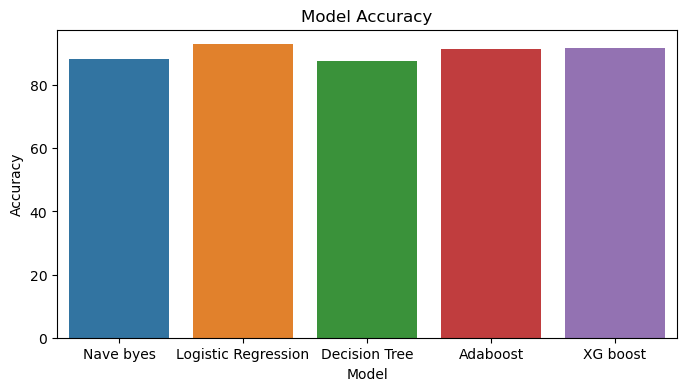

In [45]:
plt.figure(figsize=(8,4))
plt.title('Model Accuracy')
sns.barplot(x='Model',y='Accuracy',data=for_visual[['Model','Accuracy']])
plt.show()

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
LRparam_grid = {
               'n_jobs':[int,None],
               'l1_ratio':[float,None],
               'verbose':[int,0],
               'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'fit_intercept':[bool,True],
               'intercept_scaling':[float,1],
               'class_weight':['balanced',None],
               'C':[100, 10, 1.0, 0.1, 0.01]
               }

In [36]:
lr_model=RandomizedSearchCV(estimator = lg,
                                   param_distributions =LRparam_grid,
                                   n_iter = 100,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   verbose = 1, 
                                   random_state = 1,
                                  )
lr_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Subodhita\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
485 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
275 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Subodhita\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Subodhita\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Subodhita\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 637, in _validate

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'class_weight': ['balanced', None],
                                        'fit_intercept': [<class 'bool'>, True],
                                        'intercept_scaling': [<class 'float'>,
                                                              1],
                                        'l1_ratio': [<class 'float'>, None],
                                        'n_jobs': [<class 'int'>, None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'verbose': [<class 'int'>, 0]},
                   random_state=1, scoring='accuracy', verbose=1)

In [37]:
lr_model.best_estimator_

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [38]:
lr_model.best_params_

{'verbose': 0,
 'solver': 'newton-cg',
 'n_jobs': None,
 'l1_ratio': None,
 'intercept_scaling': 1,
 'fit_intercept': True,
 'class_weight': 'balanced',
 'C': 1.0}

In [39]:
param={'verbose': [0],
 'solver': ['lbfgs'],
 'n_jobs': [None],
 'l1_ratio': [None],
 'intercept_scaling': [1],
 'fit_intercept': [True],
 'class_weight': ['balanced'],
 'C': [1.0]}

In [40]:
clf = GridSearchCV(lg, param, cv=5)

In [41]:
grid_nodel=clf.fit(X_train,y_train)
grid_nodel

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0], 'class_weight': ['balanced'],
                         'fit_intercept': [True], 'intercept_scaling': [1],
                         'l1_ratio': [None], 'n_jobs': [None],
                         'solver': ['lbfgs'], 'verbose': [0]})

In [42]:
grid_nodel.best_params_

{'C': 1.0,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'n_jobs': None,
 'solver': 'lbfgs',
 'verbose': 0}

In [43]:
y_grid_pred=grid_nodel.predict(X_test)

In [44]:
accuracy_score(y_grid_pred,y_test)*100

92.92307692307692